<a href="https://colab.research.google.com/github/nahidame/QuaziNahida.github.io/blob/main/2_Project_used_Car_Quazi_Nahida_Sultana_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<b><h2><center>Cars4U Project </center></h2></b>

### **Description**

### **Objective**

Explore and visualize the dataset : <br> 

> **1.** Build a linear regression model to predict the prices of used cars <br>
 **2.** Based on the analysis generate a set of insights and recommendations that will help the business. <br><br>

### **Data Description:**

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.- <br>

> **1.** S.No.: Serial number <br> 
  **2.** Name: Name of the car which includes brand name and model name <br>
  **3.** Location: Location in which the car is being sold or is available for purchase (cities)  <br>
  **4.** Year: Manufacturing year of the car <br>
  **5.** Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km <br>
  **6.** Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG) <br>
  **7.** Transmission: The type of transmission used by the car (Automatic/Manual) <br>
  **8.** Owner: Type of ownership <br>
  **9.** Mileage: The standard mileage offered by the car company in kmpl or km/kg <br>
  **10.** Engine: The displacement volume of the engine in CC <br>
   **11.** Power: The maximum power of the engine in bhp <br>
  **12.** Seats: The number of seats in the car <br>
  **13.** New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR) <br>
  **14.** Price: The price of the used car in INR Lakhs <br>

### **Key Question:**

> **1.** Is there a good predictive model for the used car price? <br> 
> **2.** What does the performance assessment look like for such a model? <br>
> **3.** Does name of a car have any effect on pricing of car? <br> 
> **4.**How does type of Transmission effect pricing?  <br> 
> **5.** Does Location in which the car being sold has any effect on the price? <br> 

### **Importing the necessary packages**

Let's start by importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

In [ ]:
### IMPORT: ------------------------------------
import scipy.stats as stats 

%matplotlib inline

 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

Load Libraries- Done


**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/DATA SCIENCE 2022/5- Supervised Learning_ Data Processing/used_cars_data.csv" 
data1=pd.read_csv(path)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = data1.copy()

### **Data Overview**

**Checking the data Type of the columns for the dataset**

In [ ]:
# let's check the data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- *There are some missing values in 5 columns*
- *The S.No, Year, Kilometers_Driven, Seats, New_Price, Price columns are being read as a 'numerical' datatype*

- *The rest of the columns are 'Object' datatype*

**View the first and last 5 rows of the dataset**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,5.51000,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,16.06000,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61000,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,11.27000,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,53.14000,17.74000


In [ ]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,13.23000,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,10.15000,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,9.47000,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,10.15000,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,86.97000,NaN


- *The 'Mileage column contains two different unit kmpl and km/kg unit. Need to investigate more*
- *By removing unit the from Mileage,Engine, Power column, these column will be changed to integer instead of object type*

**Understand the shape of the dataset**

In [ ]:
data.shape

(7253, 14)

- *The dataset has 7253 rows and 14 columns*

In [ ]:
# Check for any missing value 
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- There are some missing values in 5 columns
- There is no missing values in rest of 9 columns
- Price has 1234 missing values.This needs to be analysed further.
- Seats has only 53 values missing and number of seats can be one of key factor in deciding price.
- Power and Engine has 175 & 46 missing values respectively.
- Mileage only has two values missing.
- Mileage , Engine , Power we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

### *Processing columns*


In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00000,9.47000,6.00000
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00000,5.44000,4.11000
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00000,35.29000,6.00000
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00000,86.97000,35.28000
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00000,8.23000,6.34000
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.00000,28.05000,24.82000
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00000,86.97000,32.00000
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00000,67.10000,20.77000
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00000,10.25000,2.50000
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.00000,9.36000,8.20000


In [ ]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
----------------------------------------
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
----------------------------------------
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
----------------------------------------
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: Seats, dtype: int64
----------------------------------------
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998  

## *Categorical Variables observations*
- Diesel cars are sold mostly 
- Mumbai has heightest number of car available to sold 
- 5204 cars are sold manual transmission
- 5 seater car are mostly available 
- Year range ofthe car is 1996 to 2019
- First hand car is popular 

## Data Preprocessing

### Processing Engine,Power ,Mileage columns

Datatype for Engine ,Power and Mileage are object because of unit assigned ,so striping units.

In [ ]:
typeoffuel=['CNG','LPG']
data.loc[data.Fuel_Type.isin(typeoffuel)].head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,5.51000,1.75000
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00000,10.25000,2.35000
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,5.51000,3.25000
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,7.88000,1.40000
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00000,4.92500,4.70000
839,839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.00000,4.36000,2.10000
893,893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.00000,10.25000,1.90000
936,936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00000,5.51000,2.85000
987,987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00000,5.51000,1.45000
1135,1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,7.88000,2.00000


In [ ]:
data[data.Mileage.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58000,13.00000
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,24.01000,12.75000


### Mileage Column containing km/kg amounts

Mileage unit is km/kg, will detect the rows.

**Let's check the count of each unique category in each of the categorical/object and Integer type variables.**


- Mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them no need of conversion . Dropping units from mileages, Engine and Power.

In [ ]:
data[data.Mileage.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58000,13.00000
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,24.01000,12.75000


In [ ]:
data["Mileage"] = data["Mileage"].str.rstrip(" kmpl")
data["Mileage"] = data["Mileage"].str.rstrip(" km/kg")

### Engine

In [ ]:
#remove units
data["Engine"] = data["Engine"].str.rstrip(" CC")

### Power

In [ ]:
#remove bhp and replace null with nan
data["Power"] = data["Power"].str.rstrip(" bhp")
data["Power"]= data["Power"].replace(regex="null", value = np.nan)

In [ ]:
# Check for any missing value 
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [ ]:
#verify the data
num=['Engine','Power','Mileage']
data[num].sample(20)

,Engine,Power,Mileage
1621,1199,73.9,20.86
3871,1248,74,23.4
4879,1197,85.8,19.1
740,624,37.48,21.9
7222,998,67.04,23.1
3723,796,47.3,24.7
1988,2179,147.51,12.39
2893,2494,100.6,12.99
7009,1197,82.85,18.5
6175,814,55.2,21.1


I had seen some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage. Will check once again after converting datatype

In [ ]:
data.query("Power == '0.0'")['Power'].count()

0

In [ ]:
data.query("Mileage == '0.0'")['Mileage'].count()

81

Converting this observations to Nan so we will remember to handle them when handling missing values.

In [ ]:
data.loc[data["Mileage"]=='0.0','Mileage']=np.nan

In [ ]:
data.loc[data["Engine"]=='0.0','Engine'].count()

0

In [ ]:
data[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [ ]:
data[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

## Processing Seats

In [ ]:
data.query("Seats == 0.0")['Seats']

3999   0.00000
Name: Seats, dtype: float64

In [ ]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
data.loc[3999,'Seats'] =np.nan

**Checking for duplicate entries in the data**

In [ ]:
data.duplicated().sum()

0

 - *There is no duplicated values in any column*

## Converting datatype 

In [ ]:
#converting object data type to category data type
data["Fuel_Type"] = data["Fuel_Type"].astype("category")
data["Transmission"] = data["Transmission"].astype("category")
data["Owner_Type"] = data["Owner_Type"].astype("category")
#converting datatype  
data["Mileage"] = data["Mileage"].astype(float)
data["Power"] = data["Power"].astype(float)
data["Engine"]=data["Engine"].astype(float)

**Let's check the statistical summary of the data.**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.00000,3626.00000,2093.90508,0.00000,1813.00000,3626.00000,5439.00000,7252.00000
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
New_Price,7253.00000,21.30732,24.25631,3.91000,7.88000,11.30000,21.69000,375.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000


**Processing Years to Derive Age of car**

The cars are from 1996 to 2019, This will not help to understand how old cars are and its effect on price. so creating two new columns current year and Age . Current year would be 2022 and Age column would be Ageofcar= current_year - Year. And then drop current_year column.

In [ ]:
data['Current_year']=2022
data['Ageofcar']=data['Current_year']-data['Year']
data.drop('Current_year',axis=1,inplace=True)
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,5.51000,1.75000,12
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,16.06000,12.50000,7
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61000,4.50000,11
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,11.27000,6.00000,10
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,53.14000,17.74000,9


## Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [ ]:
#dropping rows with name as null
data.dropna(subset= ['Name'])

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,5.51000,1.75000,12
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,16.06000,12.50000,7
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61000,4.50000,11
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,11.27000,6.00000,10
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,53.14000,17.74000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54000,1598.00000,103.60000,5.00000,13.23000,NaN,11
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21000,1197.00000,103.60000,5.00000,10.15000,NaN,7
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08000,1461.00000,63.10000,5.00000,9.47000,NaN,10
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20000,1197.00000,103.60000,5.00000,10.15000,NaN,9


In [ ]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
data['Brand'] = data['Name'].str.split(' ').str[0] #Separating Brand name from the Name
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]

In [ ]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
#changing brandnames
data.loc[data.Brand == 'ISUZU','Brand']= 'Isuzu'
data.loc[data.Brand == 'Mini', 'Brand']= 'Mini Cooper'
data.loc[data.Brand =='Land', 'Brand']= 'Land Rover'
#data['Brand']=data["Brand"].astype("category")

In [ ]:
data.groupby(data.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset. Maruti brand is most available for purchase/Sold, the next is Hyundai of 1340 sold.

In [ ]:
data.Model.isnull().sum()

1

In [ ]:
#drop row with no model
data.dropna(subset=['Model'],axis=0,inplace=True)

In [ ]:
data.Model.nunique()

726

In [ ]:
data.groupby('Model')['Model'].size().nlargest(20)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7252.00000,3625.52551,2093.65947,0.00000,1812.75000,3625.50000,5438.25000,7252.00000
Year,7252.00000,2013.36652,3.25316,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7252.00000,58700.26269,84433.48037,171.00000,34000.00000,53429.00000,73000.00000,6500000.00000
Mileage,7169.00000,18.34711,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7206.00000,1616.60505,595.32041,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7077.00000,112.76871,53.49652,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7198.00000,5.28049,0.80938,2.00000,5.00000,5.00000,5.00000,10.00000
New_Price,7252.00000,21.30870,24.25770,3.91000,7.88000,11.30000,21.69750,375.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
Ageofcar,7252.00000,8.63348,3.25316,3.00000,6.00000,8.00000,11.00000,26.00000


- Year started from  1996 to 2019. 50% of data is from 2011 to 2016 range. 
- Kilometers_Driven minimuum is 171 km and Maximum is 650000 km. Median is 53429 km. This is very high. It seems to have outliers. 
- Mileage is normally distributed. 
- Engine is right skewed and has some otliers.
- Power and Price are also righ skewed. 

# Handling missing values

In [ ]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price               0
Price                1233
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

## Calculating missing values in each row

In [ ]:
# counting the number of missing values per row
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    5844
1    1299
2      57
3      31
4      20
5       1
dtype: int64

In [ ]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      30
Power        74
Seats         1
Price      1194
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
Mileage    35
Power      50
Seats       6
Price      23
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage     6
Engine     25
Power      30
Seats      26
Price       6
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage    11
Engine     20
Power      20
Seats      20
Price       9
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage    1
Engine     1
Power      1
Seats      1
Price      1
dtype: int64





We can start filling missing values by grouping name and year and fill in missing values. with median

In [ ]:
data.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003   1489.00000
Audi A3 35 TDI Attraction                      2014   1968.00000
Audi A3 35 TDI Premium                         2016   1968.00000
Audi A3 35 TDI Premium Plus                    2015   1968.00000
                                               2016   1968.00000
Audi A3 35 TDI Technology                      2017   1968.00000
Audi A4 1.8 TFSI                               2010   1781.00000
                                               2011   1781.00000
Audi A4 1.8 TFSI Technology Edition            2012   1798.00000
Audi A4 2.0 TDI                                2009   1968.00000
                                               2011   1968.00000
                                               2012   1968.00000
                                               2013   1968.00000
                                               2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  

In [ ]:

data['Engine']=data.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
data['Power']=data.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
data['Mileage']=data.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [ ]:
col=['Engine','Power','Mileage']
data[col].isnull().sum()

Engine      45
Power      162
Mileage     82
dtype: int64

There are still missing values , analyzing further . Grouping by only Model for Engine and then filling missing values with median. For Power and Mileage Engine values for a Brand can be used to get more accurate value

In [ ]:
data.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

Chosing Median to fill the the missing value as there are many outliers, grouping by model and year to get  more granularity and more accurate Engine and then fillig with median

In [ ]:
data['Engine']=data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data['Power']=data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data['Mileage']=data.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [ ]:
col=['Engine','Power','Mileage']
data[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

There are still missing values , analyzing further .Grouping by only Model for Engine and then filling missing values with median. For Power and Mileage Engine values for a Brand can be used to get more accurate value.

In [ ]:
data.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending='True').head(10)

median        max       mean
Model   Year                                 
1000AC  1998  970.00000  970.00000  970.00000
1Series 2013 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
370ZAT  2012 3696.00000 3696.00000 3696.00000
3Series 2018 1995.00000 1995.00000 1995.00000
        2017 1995.00000 1995.00000 1995.00000
        2016 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
        2014 1995.00000 2993.00000 2078.16667
        2013 1995.00000 2993.00000 2066.42857

In [ ]:
data.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

mean       max    median
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 181.03333 187.74000 187.74000
           1968.00000 167.12318 187.74000 174.33000
           1984.00000 196.02200 226.60000 207.90000
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 241.74000 246.70000 241.40000

## Missing value : Seats

In [ ]:
data['Seats'].isnull().sum()

54

Grouping with Name should give me more granularity, and near to accurate Seat values.

In [ ]:
data['Seats']=data.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data['Seats'].isnull().sum()

47

Grouping with Model should give me more granularity, and near to accurate Seat values.

In [ ]:
data['Seats']=data.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data['Seats'].isnull().sum()

23

In [ ]:
#Lets check which car types have missing values.
data[data['Seats'].isnull()==True].head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar,Brand,Model
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,NaN,NaN,NaN,7.88000,2.11000,12,Maruti,Swift1.3
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,NaN,NaN,NaN,7.88000,1.75000,16,Maruti,Swift1.3
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,NaN,NaN,NaN,7.88000,5.80000,7,Maruti,Swift1.3
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10000,NaN,NaN,NaN,7.88000,3.15000,11,Maruti,Swift1.3
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10000,NaN,NaN,NaN,7.88000,4.70000,7,Maruti,Swift1.3
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10000,NaN,NaN,NaN,7.88000,1.75000,15,Maruti,Swift1.3
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50000,1061.00000,NaN,NaN,7.88000,1.50000,14,Maruti,EstiloLXI
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.10000,NaN,NaN,NaN,7.88000,4.24000,8,Maruti,Swift1.3
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.10000,NaN,NaN,NaN,7.88000,2.35000,16,Maruti,Swift1.3
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00000,NaN,NaN,NaN,33.51000,11.99000,9,Honda,CR-VAT


In [ ]:
#most of cars are 5 seater so fillrest of 23 by 5
data['Seats']=data['Seats'].fillna(5)

In [ ]:
data['Seats'].isnull().sum()

0

In [ ]:
# Need to analyse along with price if seats plays any role in price
data["Location"] = data["Location"].astype("category")
data['Brand'] =data['Brand'].astype("category")

In [ ]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
New_Price               0
Price                1233
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

## Missing Value: Price

In [ ]:
data['Price']=data.groupby(['Name','Year'])['Price'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data.Price.isnull().sum()

554

In [ ]:
data['Price']=data.groupby(['Name'])['Price'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data.Price.isnull().sum()

177

In [ ]:
data['Price']=data.groupby(['Brand','Model'])['Price'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data.Price.isnull().sum()

39

In [ ]:
data['Price']=data.groupby(['Brand'])['New_Price'].apply(lambda x:x.fillna(x.median()))

In [ ]:
data.Price.isnull().sum()

0

In [ ]:
data.groupby(['Brand'])['Price'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Porsche         136.00000
Land Rover      120.00000
Jaguar           69.67500
BMW              55.07000
Audi             53.14000
Mercedes-Benz    49.49000
Volvo            45.67000
Mini Cooper      42.12000
Isuzu            33.68000
Mitsubishi       33.21000
Skoda            25.83000
Toyota           24.01000
Jeep             22.95000
Mahindra         18.86500
Renault          15.05000
Honda            13.58000
Ford             11.68500
Nissan           11.33000
Smart            11.30000
Ambassador       11.30000
Hindustan        11.30000
Force            11.30000
Chevrolet        11.30000
Lamborghini      11.30000
Hyundai          10.25000
Volkswagen       10.15000
Fiat              9.07500
Maruti            7.88000
Tata              7.63000
Datsun            5.63500
Name: Price, dtype: float64

In [ ]:
data.isnull().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              32
Engine               18
Power                63
Seats                 0
New_Price             0
Price                 0
Ageofcar              0
Brand                 0
Model                 0
dtype: int64

In [ ]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    data[ii] = data[ii].fillna(data[ii].median())

## Dropping remaining rows

In [ ]:
#dropping remaining rows
#cannot further fill this rows so dropping them

data.dropna(inplace=True,axis=0)

In [ ]:
data.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,5.51000,5.51000,12,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,16.06000,16.06000,7,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61000,8.61000,11,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,11.27000,11.27000,10,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,53.14000,53.14000,9,Audi,A4New


In [ ]:
data.shape 

(7252, 17)

# EDA 

## Univariate analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Age

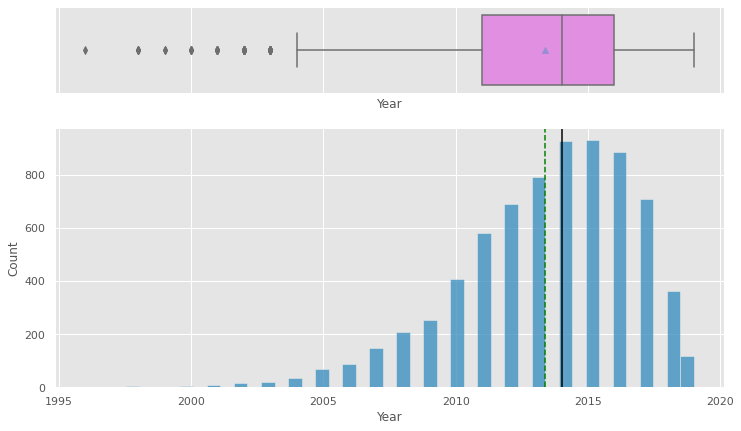

In [ ]:
histogram_boxplot(data, "Year")

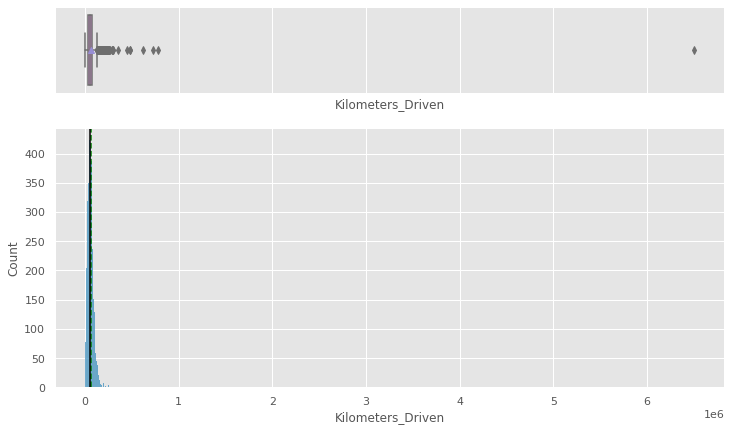

In [ ]:
histogram_boxplot(data, "Kilometers_Driven")

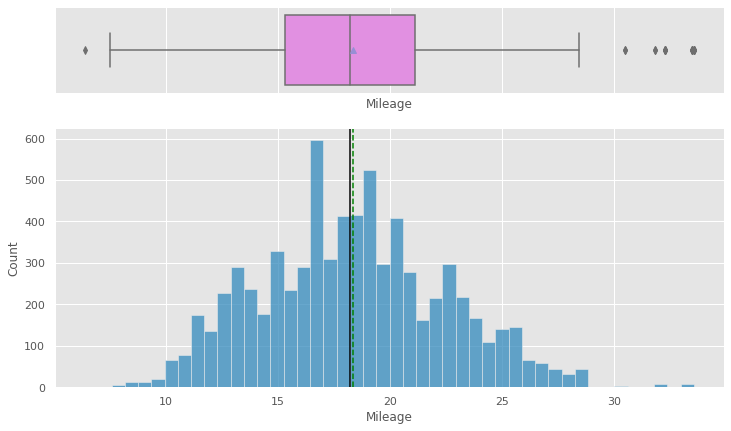

In [ ]:
histogram_boxplot(data, "Mileage")

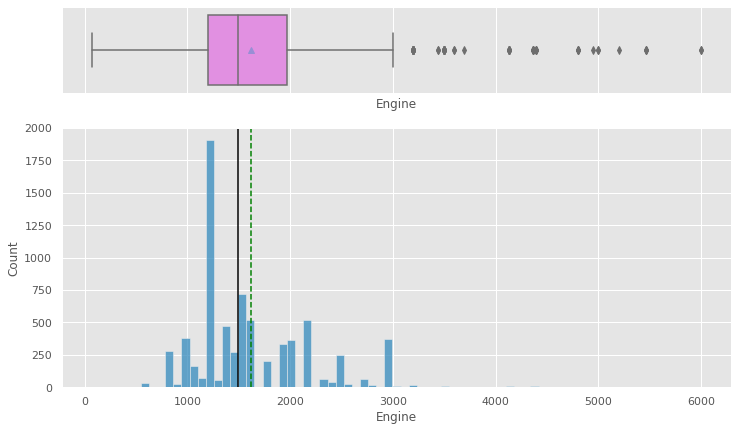

In [ ]:
histogram_boxplot(data, "Engine")

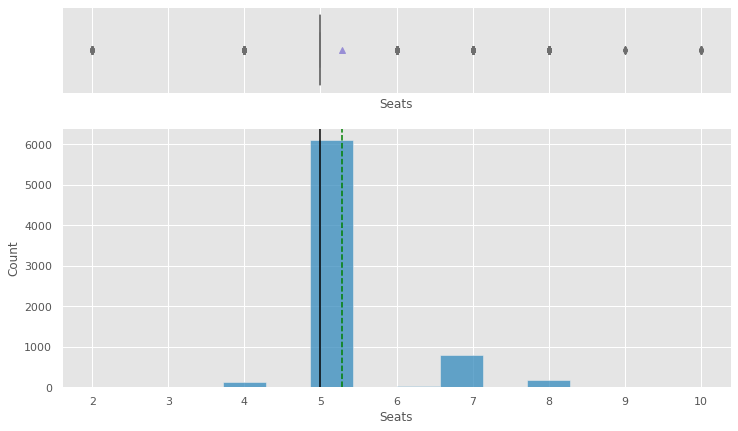

In [ ]:
histogram_boxplot(data, "Seats")

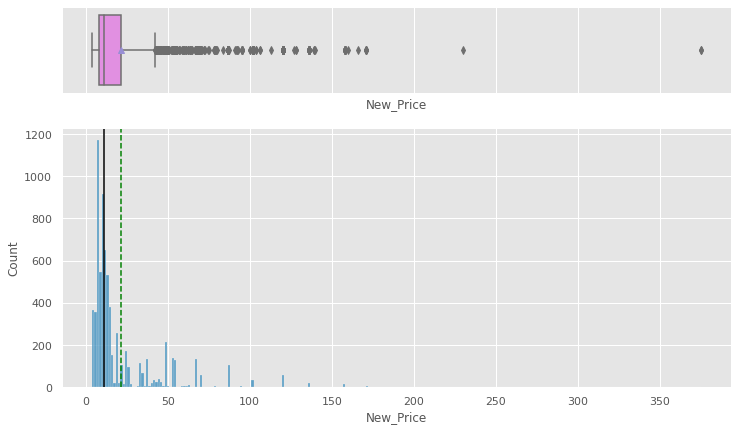

In [ ]:
histogram_boxplot(data, "New_Price")

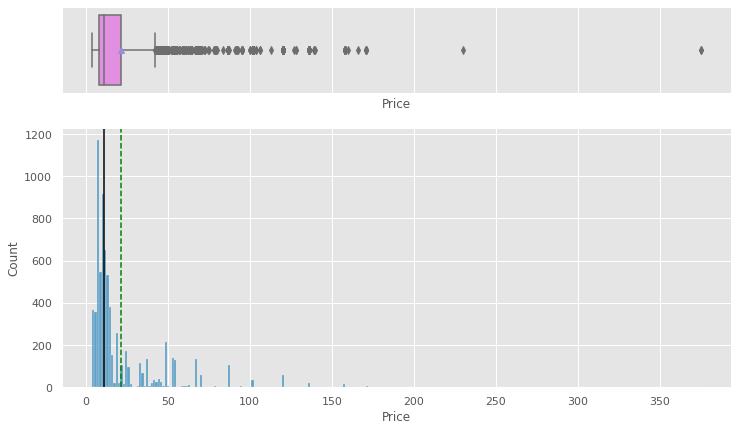

In [ ]:
histogram_boxplot(data, "Price")

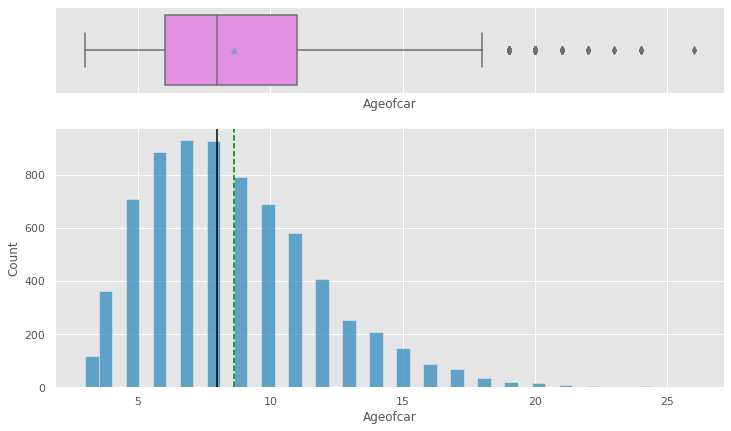

In [ ]:
histogram_boxplot(data, "Ageofcar")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

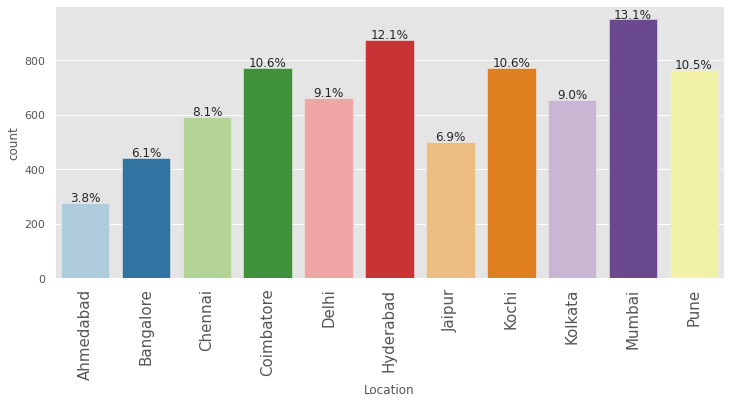

In [ ]:
labeled_barplot(data, "Location", perc=True)

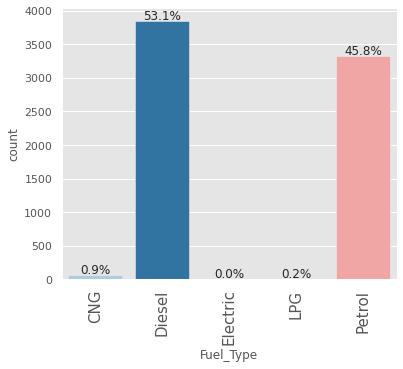

In [ ]:
labeled_barplot(data, "Fuel_Type", perc=True)

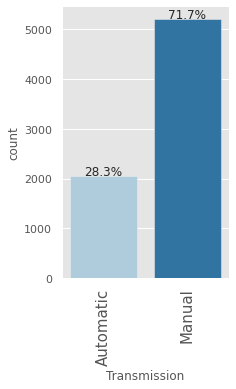

In [ ]:
labeled_barplot(data, "Transmission", perc=True)

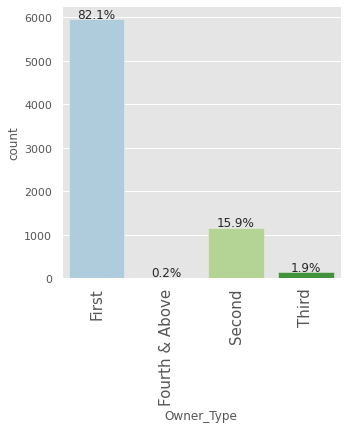

In [ ]:
labeled_barplot(data, "Owner_Type", perc=True)

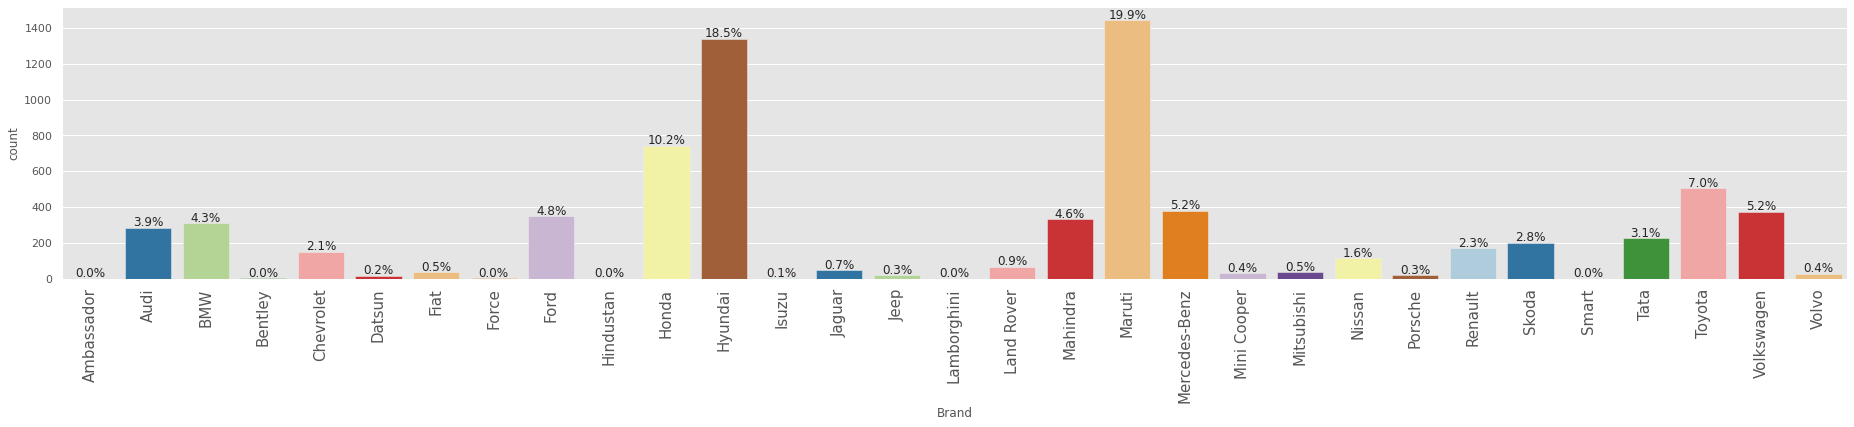

In [ ]:
labeled_barplot(data, "Brand", perc=True)

# Bivariate Analysis

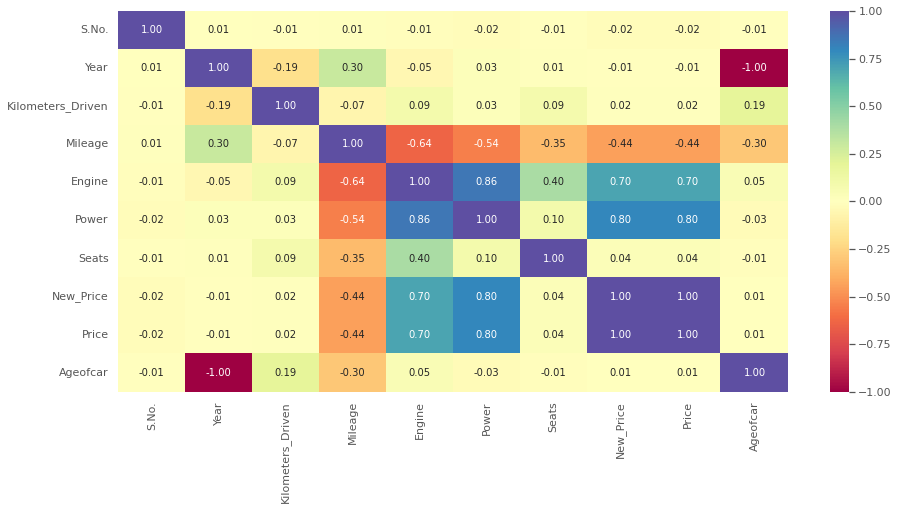

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Engine has strong positive correlation to Power [0.86], and correlation to Price, New_Price, Seats.
- Price has positive correlation to Engine [0.7] as well Power [0.8]
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar, Seats
- Price has negative correlation to Mileage.
- Year has Slight positive correlation to Mileage 

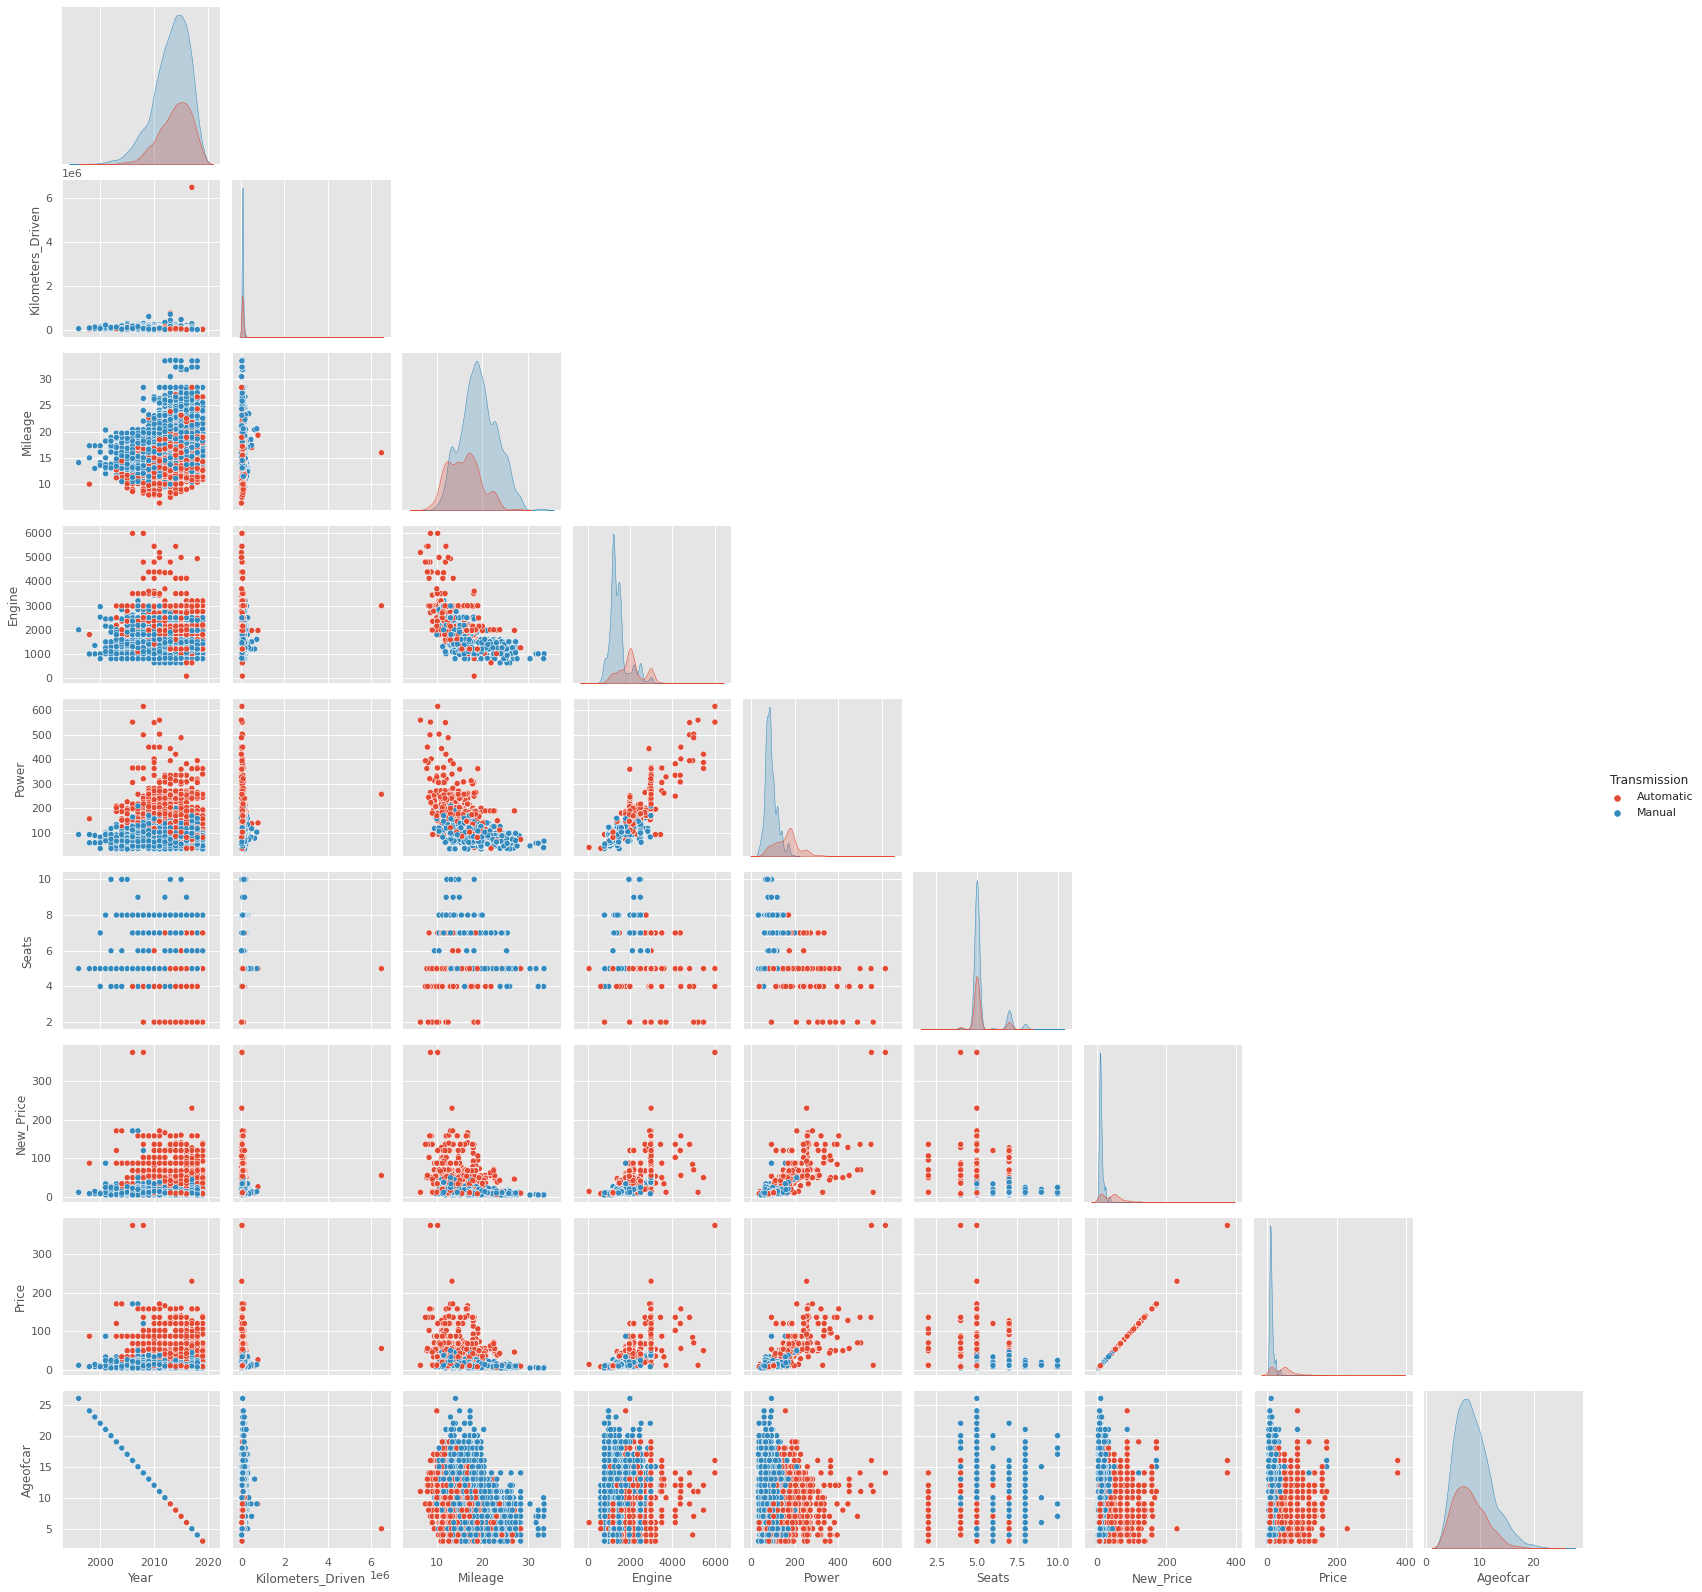

In [ ]:
sns.pairplot(data=data, vars= ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price' , 'Price' ,'Ageofcar' ], hue= 'Transmission',  corner=True)
plt.show()

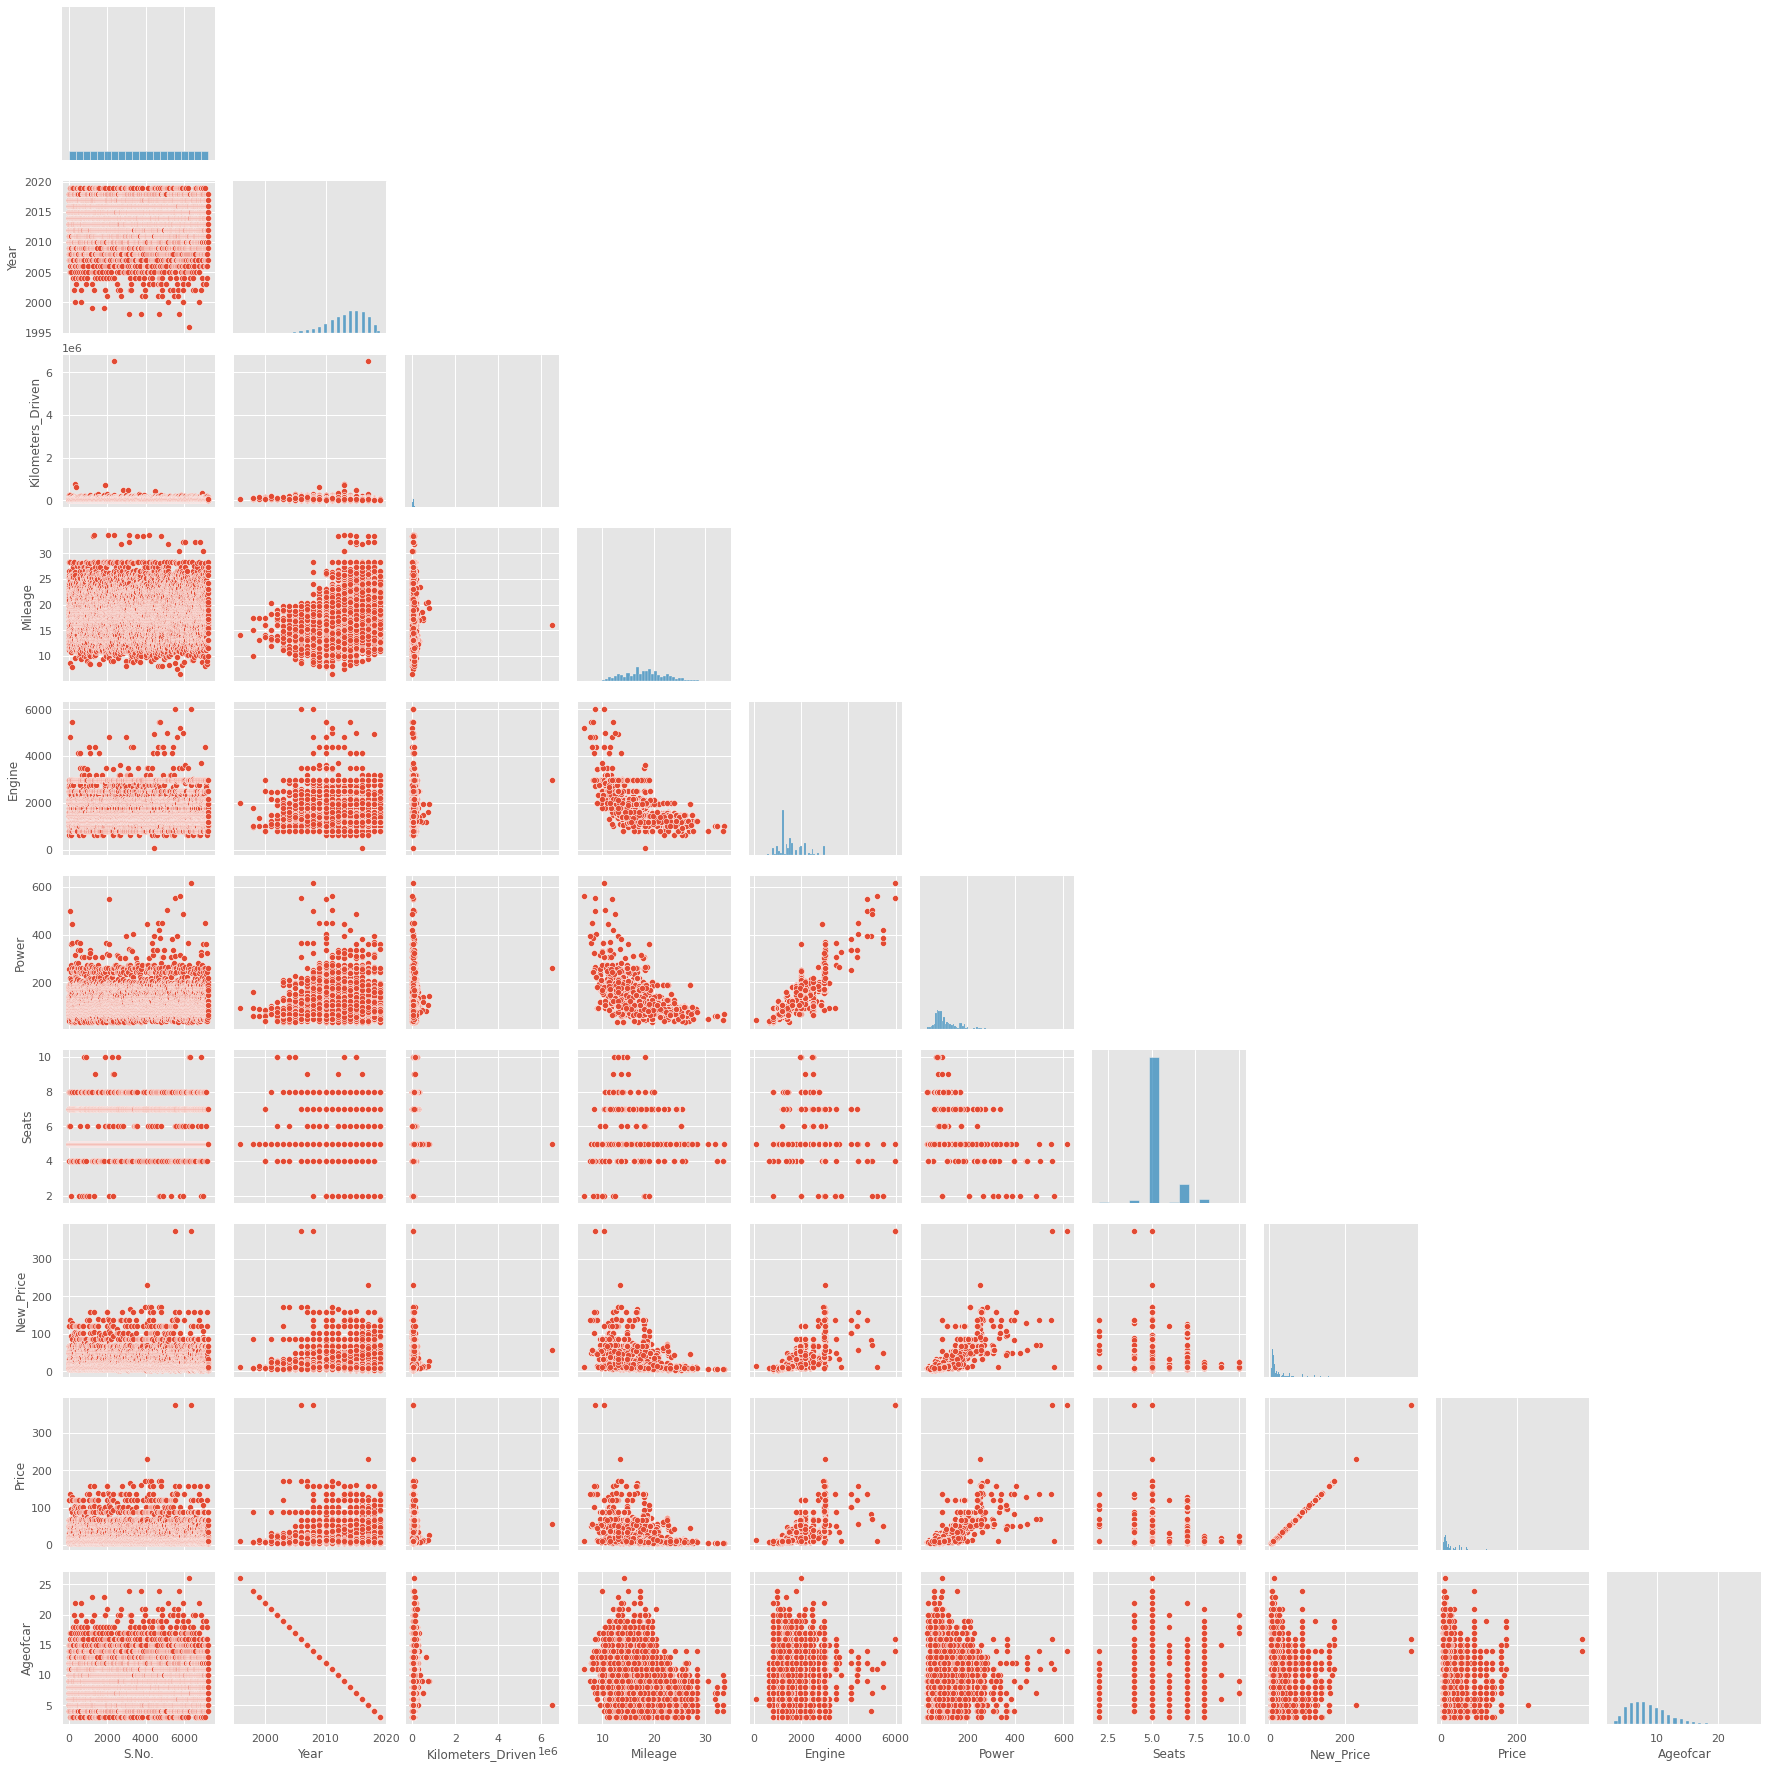

In [ ]:
sns.pairplot(data=data , corner=True)
plt.show()

## Variables that are correlated with Price variable

Price Vs Engine Vs Transmission

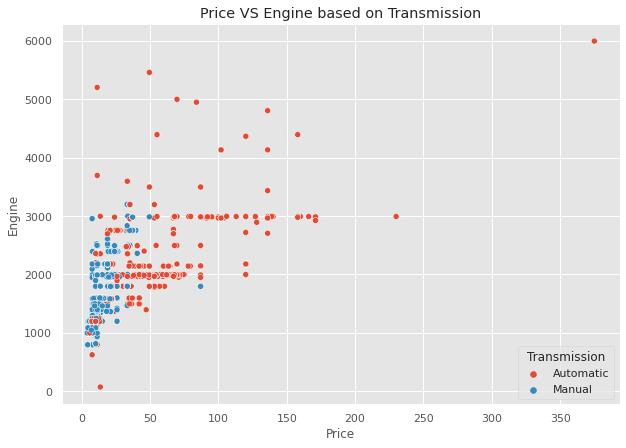

In [ ]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=data);

Price Vs Power vs Transmission

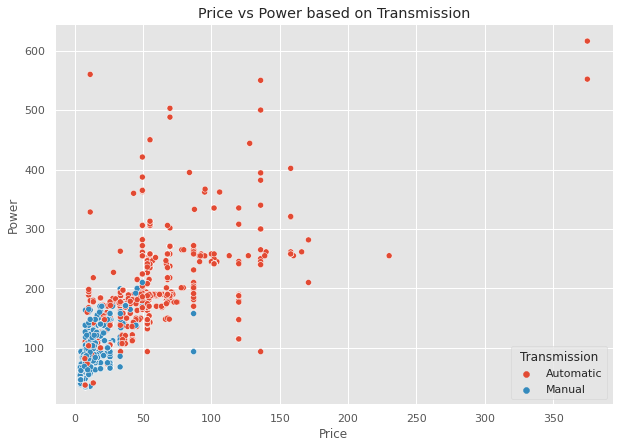

In [ ]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=data);

Price Vs Mileage Vs Transmission

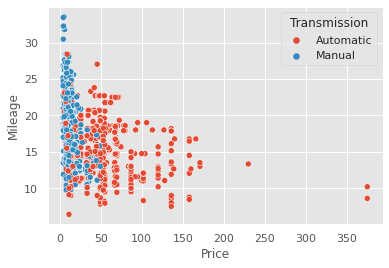

In [ ]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=data);

Price Vs Year Vs Transmission

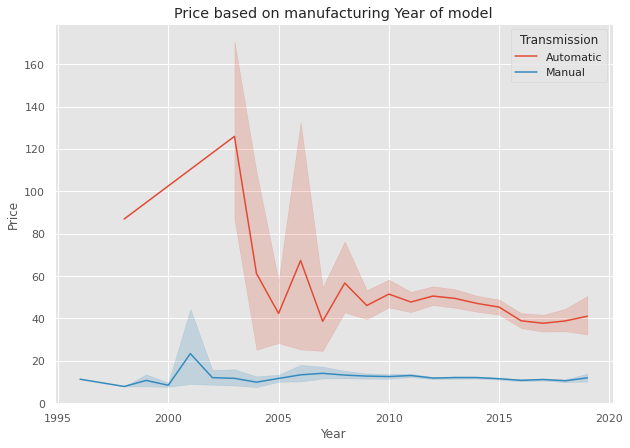

In [ ]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=data);

Price Vs Year VS Fuel Type

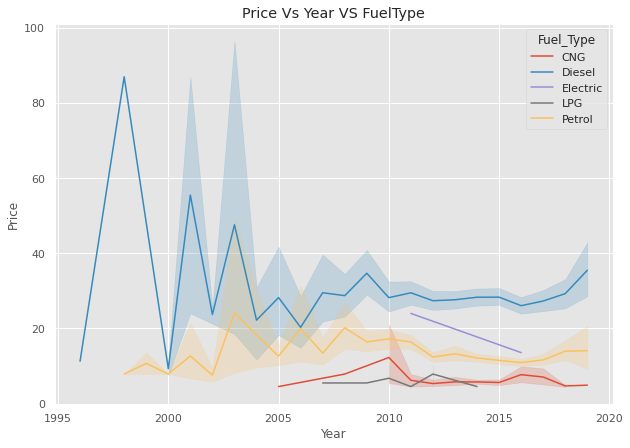

In [ ]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=data);

Year Vs Price Vs Owner_Type

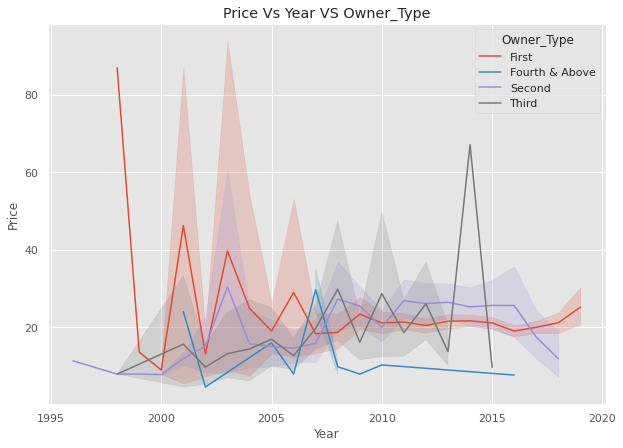

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=data);

Need to check the reason for spike in price for third owner and model in 2010.

In [ ]:
data[(data["Owner_Type"]=='Third') & (data["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar,Brand,Model
2978,2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00000,4806.00000,394.30000,4.00000,136.00000,136.00000,12,Porsche,Panamera2010
5404,5404,BMW 5 Series 2003-2012 520d,Pune,2010,170000,Diesel,Automatic,Third,18.48000,1995.00000,177.00000,5.00000,67.87000,67.87000,12,BMW,5Series
6903,6903,Honda CR-V 2.4 AT,Ahmedabad,2010,90000,Petrol,Automatic,Third,10.10000,2354.00000,152.00000,5.00000,33.51000,33.51000,12,Honda,CR-V2.4
3293,3293,Toyota Innova 2.5 GX 7 STR,Pune,2010,140000,Diesel,Manual,Third,12.80000,2494.00000,102.00000,7.00000,24.01000,24.01000,12,Toyota,Innova2.5
4962,4962,Mahindra Scorpio VLX,Bangalore,2010,144400,Diesel,Manual,Third,12.05000,2179.00000,120.00000,8.00000,18.86500,18.86500,12,Mahindra,ScorpioVLX
6532,6532,Chevrolet Cruze LTZ,Pune,2010,76000,Diesel,Manual,Third,18.30000,1991.00000,147.90000,5.00000,11.30000,11.30000,12,Chevrolet,CruzeLTZ
3479,3479,Volkswagen Passat 1.8 TSI MT,Mumbai,2010,60000,Petrol,Manual,Third,14.30000,1798.00000,160.00000,5.00000,10.15000,10.15000,12,Volkswagen,Passat1.8
5351,5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47000,1198.00000,73.90000,5.00000,10.15000,10.15000,12,Volkswagen,PoloPetrol
6677,6677,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.60000,1493.00000,93.70000,5.00000,8.60000,8.60000,12,Fiat,Punto1.4
1629,1629,Maruti Swift Lxi BSIII,Pune,2010,54898,Petrol,Manual,Third,16.10000,1298.00000,88.20000,5.00000,7.88000,7.88000,12,Maruti,SwiftLxi


The observation is for The Porsche Panamera is expensive and luxury car so the data is valid.

Price Vs Mileage vs Fuel_type

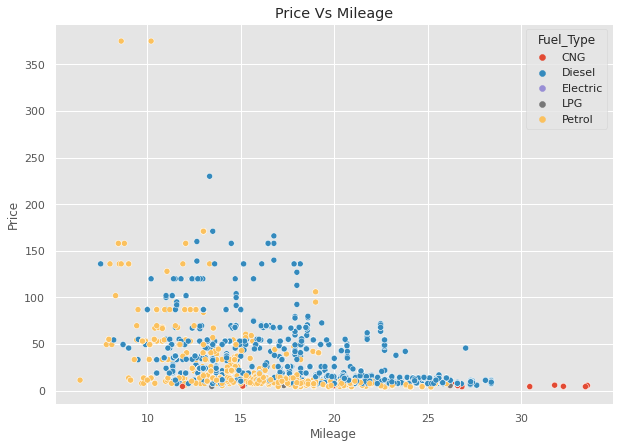

In [ ]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data= data);

Price Vs Seat

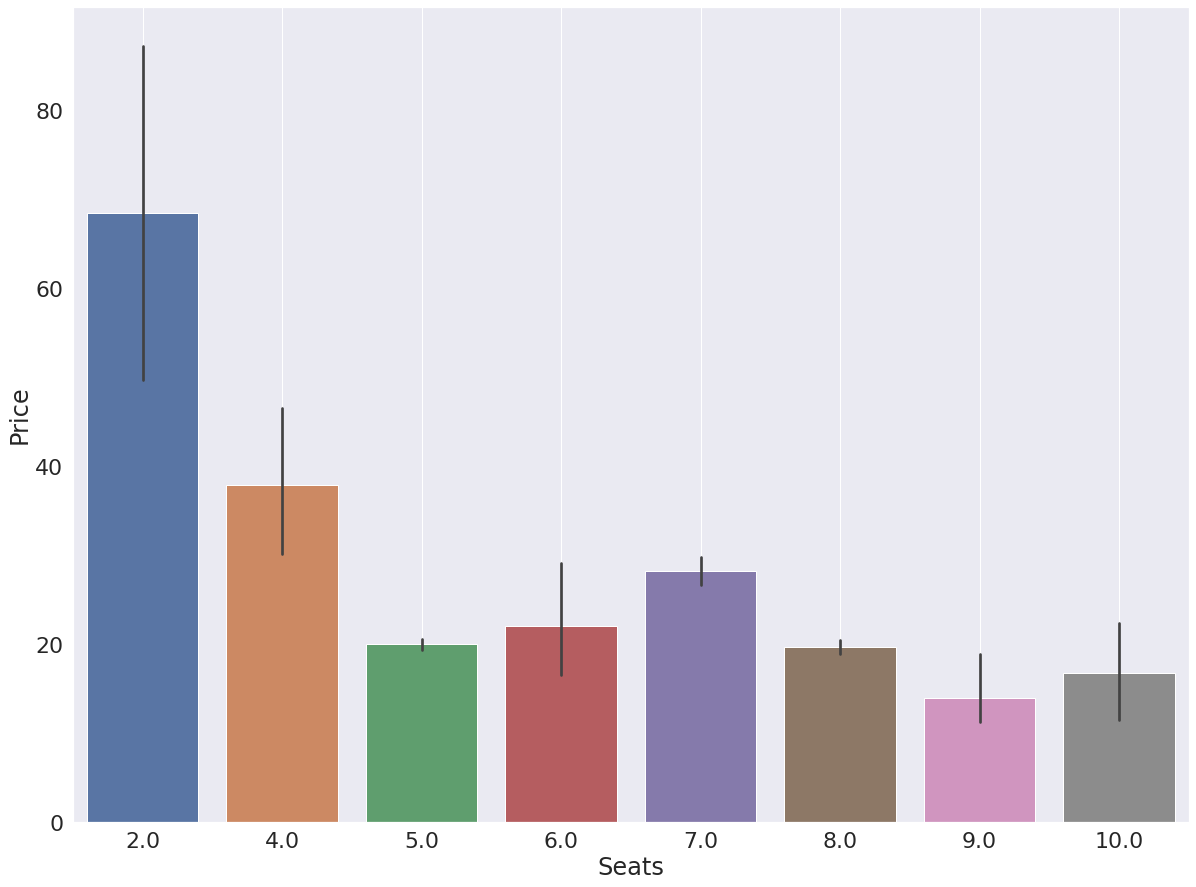

In [ ]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=data);
plt.grid()

Price Vs Location

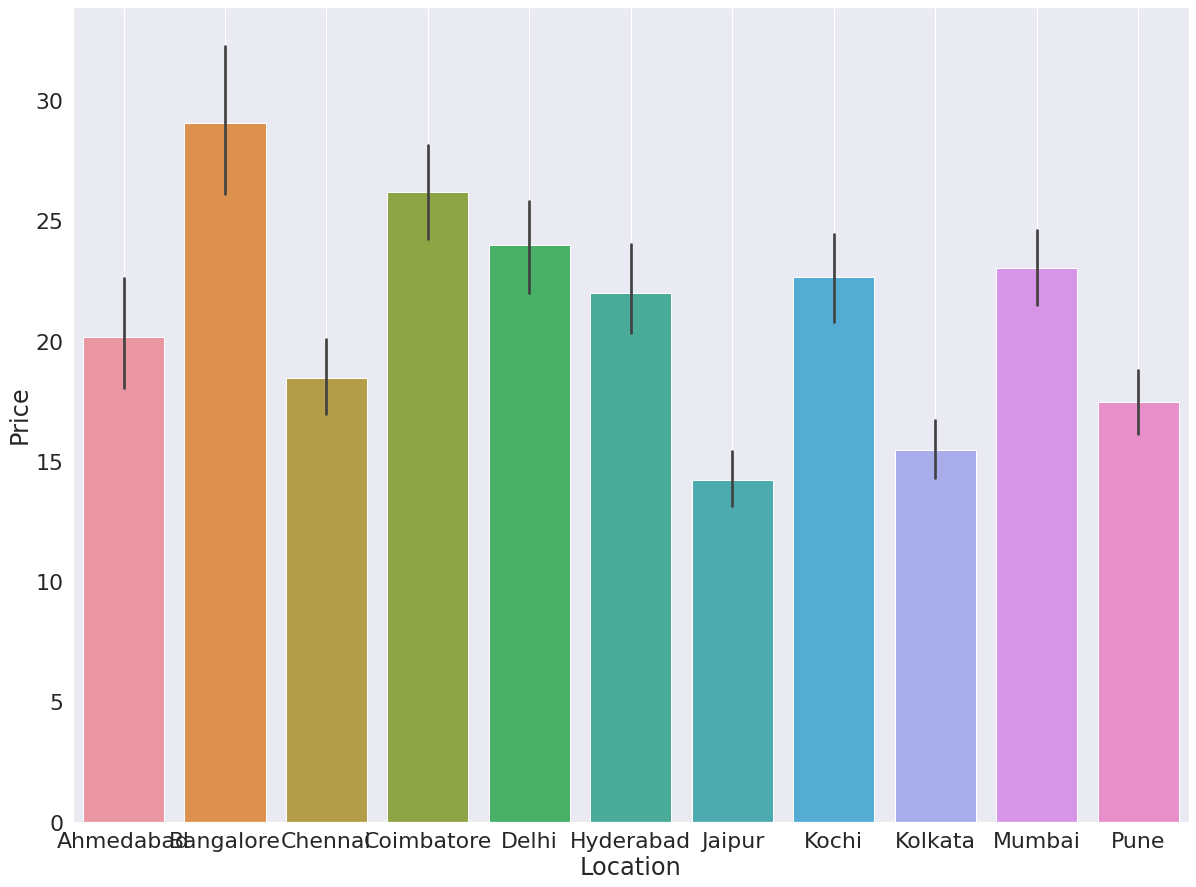

In [ ]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=data);
plt.grid()

Price Vs Brand

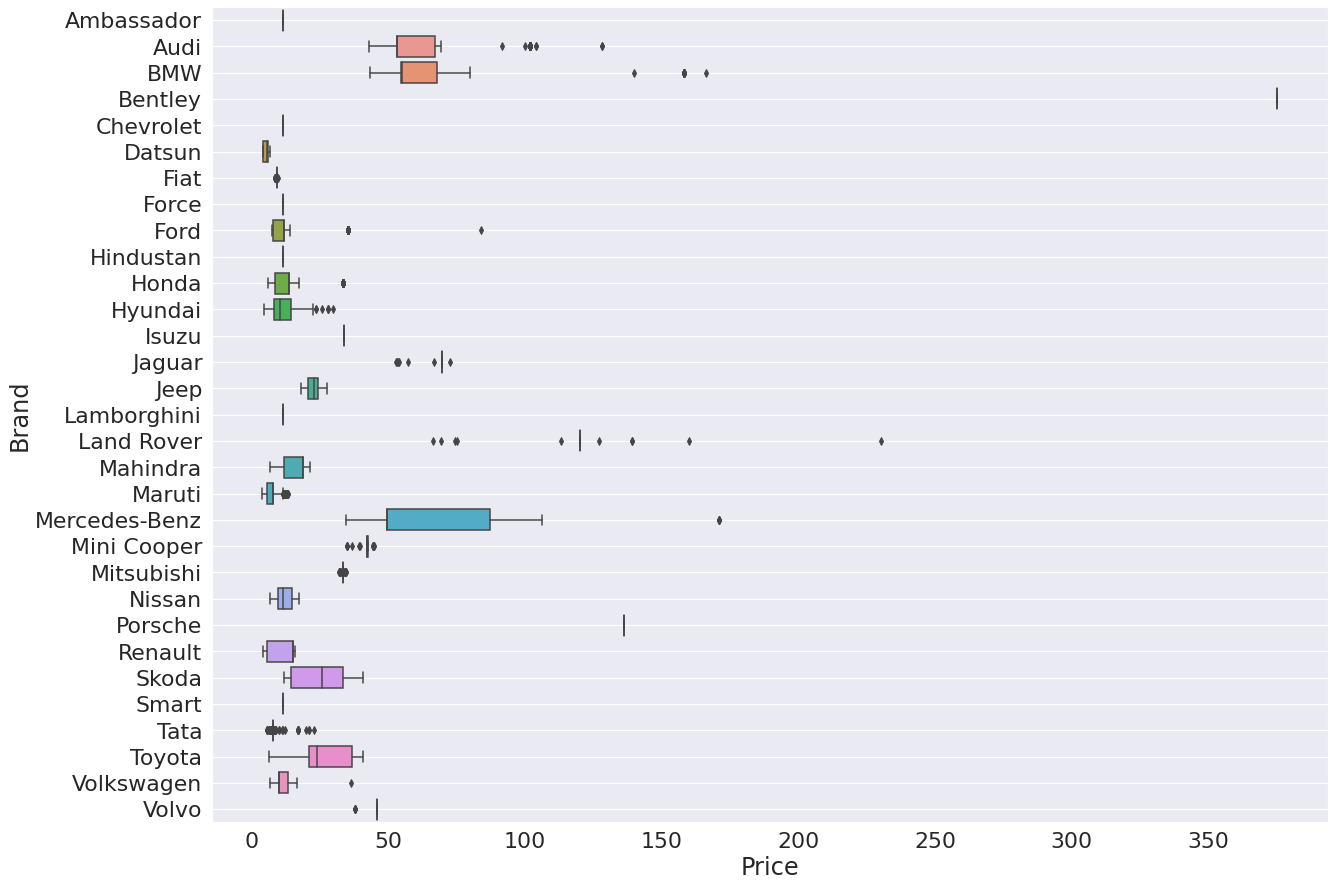

In [ ]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=data);
plt.grid()

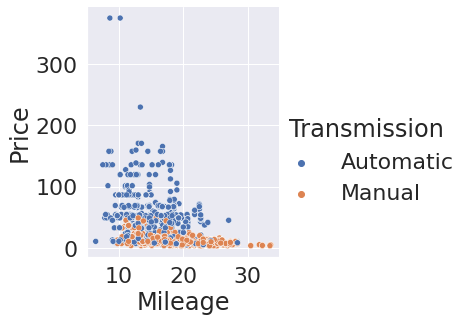

In [ ]:
sns.relplot(data=data, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5);

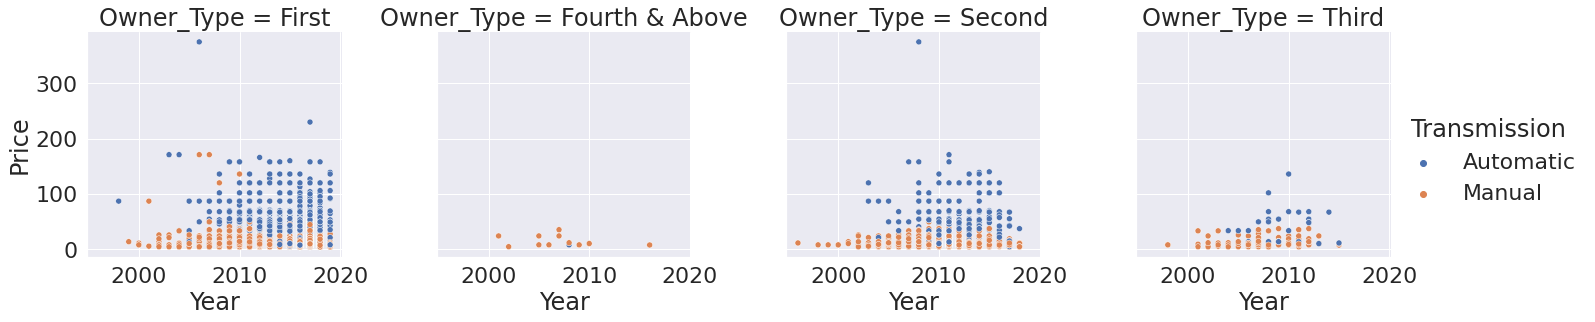

In [ ]:
sns.relplot(data=data, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

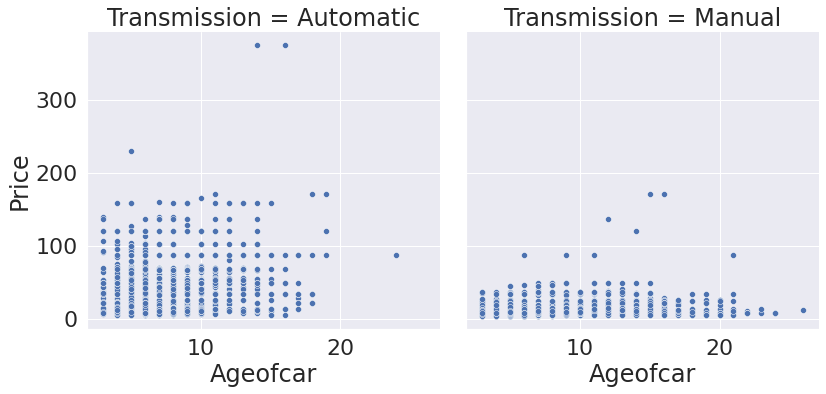

In [ ]:
sns.relplot(data=data, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=6);

- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices.
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models
- Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

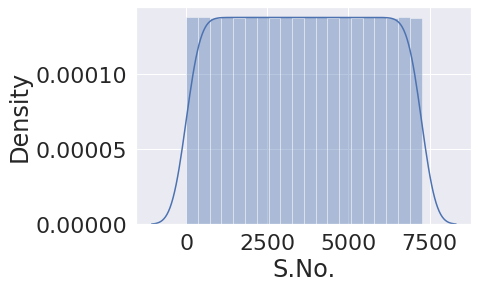

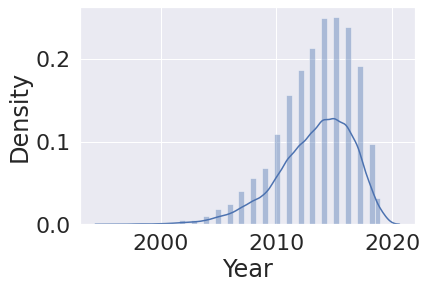

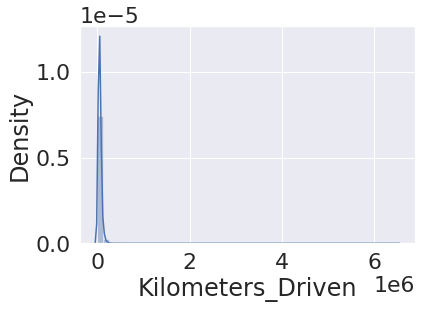

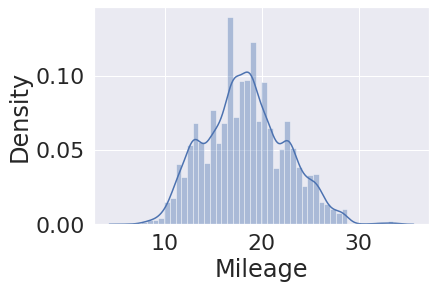

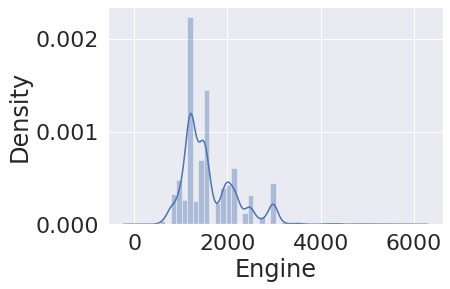

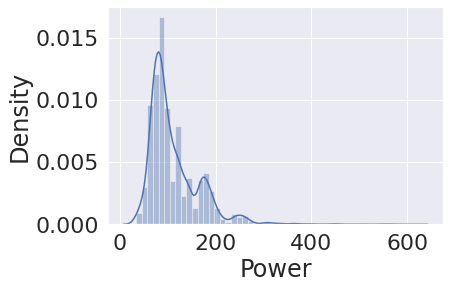

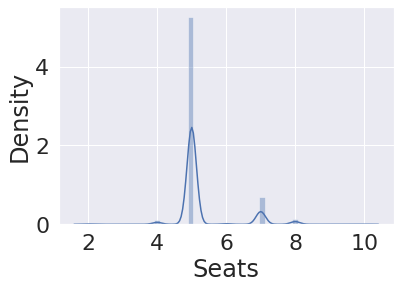

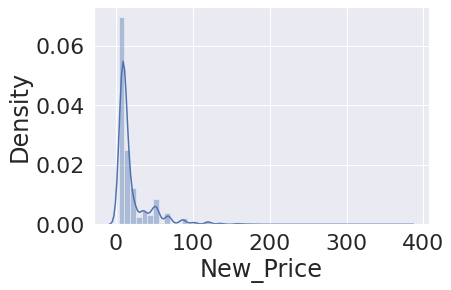

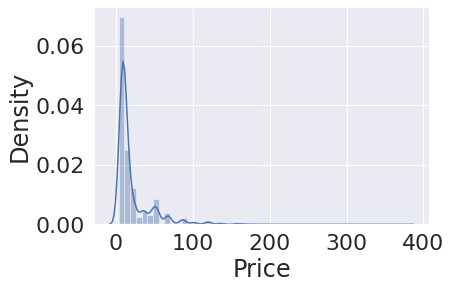

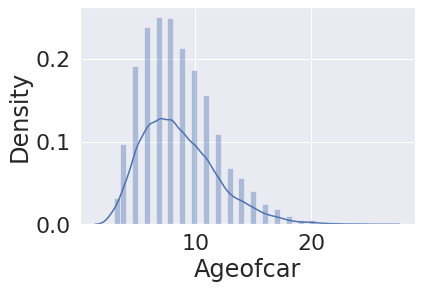

In [ ]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = data.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(data[colname], kde=True);
    plt.show()

Distrubtions are right skewed , using Log transform can help in normalization

In [ ]:
def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [ ]:
#This needs to be done before the data is split
Perform_log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  7252 non-null   int64   
 1   Name                   7252 non-null   object  
 2   Location               7252 non-null   category
 3   Year                   7252 non-null   int64   
 4   Kilometers_Driven      7252 non-null   int64   
 5   Fuel_Type              7252 non-null   category
 6   Transmission           7252 non-null   category
 7   Owner_Type             7252 non-null   category
 8   Mileage                7252 non-null   float64 
 9   Engine                 7252 non-null   float64 
 10  Power                  7252 non-null   float64 
 11  Seats                  7252 non-null   float64 
 12  New_Price              7252 non-null   float64 
 13  Price                  7252 non-null   float64 
 14  Ageofcar               7252 non-null   i

In [ ]:
data.drop(['Name','Model','Year','Brand','New_Price'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  7252 non-null   int64   
 1   Location               7252 non-null   category
 2   Kilometers_Driven      7252 non-null   int64   
 3   Fuel_Type              7252 non-null   category
 4   Transmission           7252 non-null   category
 5   Owner_Type             7252 non-null   category
 6   Mileage                7252 non-null   float64 
 7   Engine                 7252 non-null   float64 
 8   Power                  7252 non-null   float64 
 9   Seats                  7252 non-null   float64 
 10  Price                  7252 non-null   float64 
 11  Ageofcar               7252 non-null   int64   
 12  Kilometers_Driven_log  7252 non-null   float64 
 13  Price_log              7252 non-null   float64 
dtypes: category(4), float64(7), int64(3)
mem

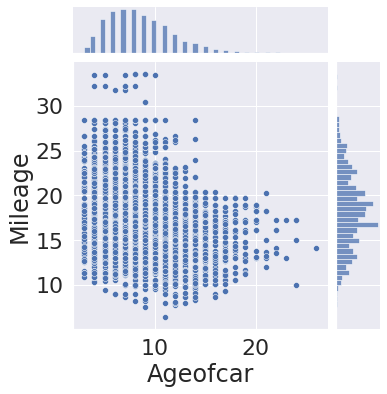

In [ ]:
sns.jointplot(data=data, x='Ageofcar', y='Mileage');

### Multivariate Analysis

<Figure size 1080x504 with 0 Axes>

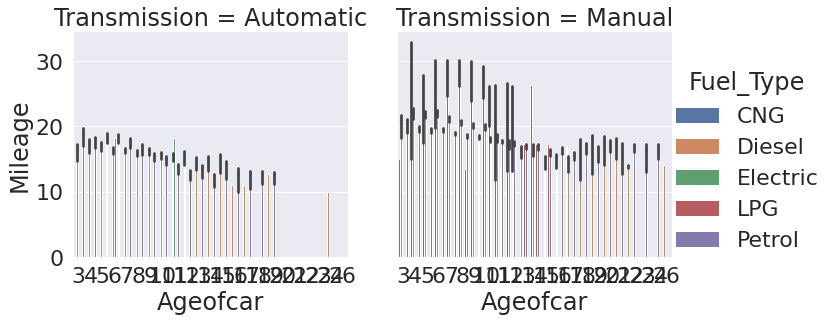

In [ ]:
plt.figure(figsize=(15,7))
sns.catplot(x='Ageofcar', y='Mileage', col='Transmission', hue='Fuel_Type' , kind="bar", data = data );

No handles with labels found to put in legend.


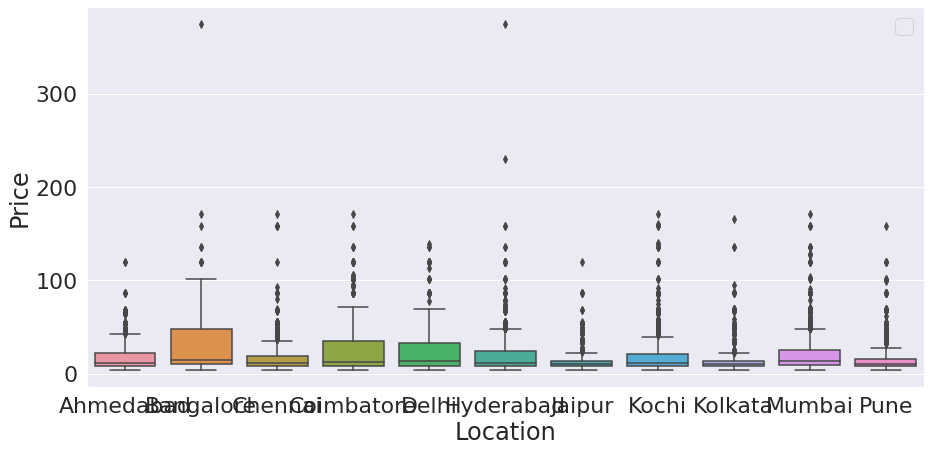

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data =data, x = data["Location"], y = data["Price"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

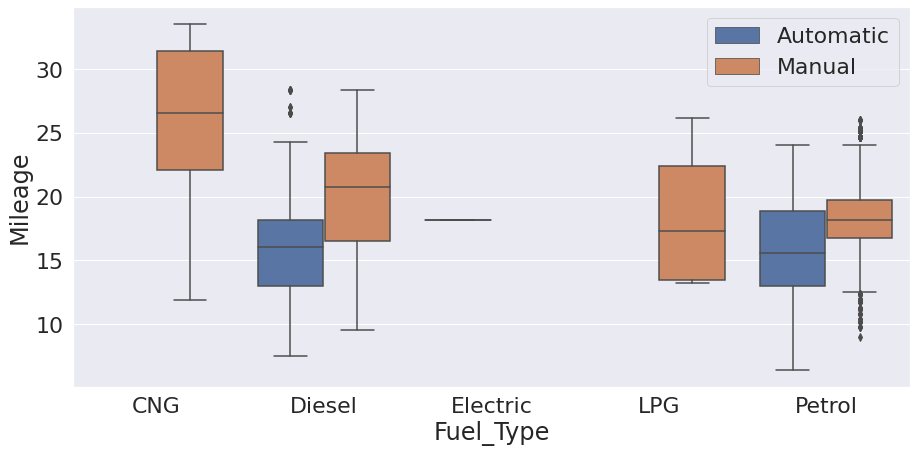

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data =data, x = data["Fuel_Type"], y = data["Mileage"], hue=data["Transmission"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

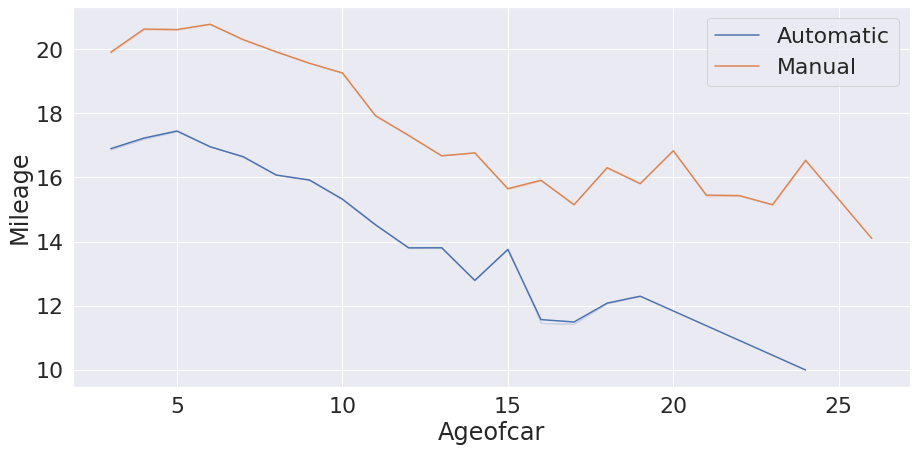

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data =data, x = data["Ageofcar"], y = data["Mileage"], hue=data["Transmission"] , ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

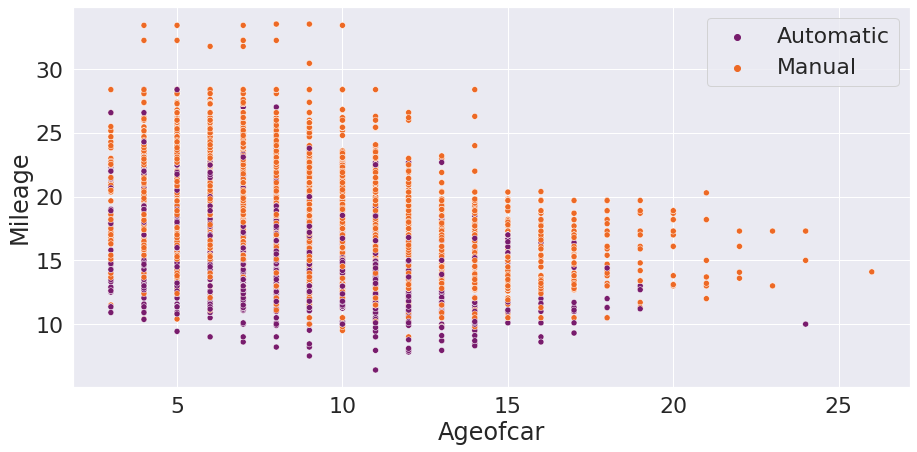

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data =data, x = data["Ageofcar"], y = data["Mileage"], hue=data["Transmission"],ci=0, palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [ ]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False)

S.No.                    0
Location                 0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Ageofcar                 0
Kilometers_Driven_log    0
Price_log                0
dtype: int64

## Model Building

In [ ]:
X = data.drop(["Price", "Price_log"], axis=1)
y = data[["Price_log", "Price"]]

### Creating dummy variables

In [ ]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [ ]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

,S.No.,Kilometers_Driven,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,72000,26.60000,998.00000,58.16000,5.00000,12,11.18442,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,41000,19.67000,1582.00000,126.20000,5.00000,7,10.62133,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2,46000,18.20000,1199.00000,88.70000,5.00000,11,10.73640,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,3,87000,20.77000,1248.00000,88.76000,7.00000,10,11.37366,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4,40670,15.20000,1968.00000,140.80000,5.00000,9,10.61325,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (5076, 26)
X_test: (2176, 26)
y_train: (5076, 2)
y_test: (2176, 2)


In [ ]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()

In [ ]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     772.3
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:22:20   Log-Likelihood:                -1967.5
No. Observations:                5076   AIC:                             3989.
Df Residuals:                    5049   BIC:                             4165.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 89%

- The model is not an underfitting or overfitting model.

- To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

- Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [ ]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)  # High Overfitting.

    Data     RMSE     MAE     MAPE
0  Train 24.27075 7.63219 29.15124
1   Test 28.12275 7.53065 32.68330


- Root Mean Squared Error of train and test data is not close , indicating that our model is not overfitting the train data.

- Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 7.5 lakhs on test data.

- The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.

- Mean Absolute Percentage Error is ~32% on the test data.

# Test Assumptions

## Checking the Linear Regression Assumptions

- No Multicollinearity
- Mean of residuals should be 0
- No Heteroscedasticity
- Linearity of variables
- Normality of error terms

## Checking Assumption 1: No Multicollinearity
We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [ ]:
# Check VIF
print(checking_vif(X_train))

                      feature        VIF
0                       const 1176.93900
1                       S.No.    1.00234
2           Kilometers_Driven    3.31096
3                     Mileage    3.31172
4                      Engine    8.58077
5                       Power    6.38894
6                       Seats    1.93620
7                    Ageofcar    2.08099
8       Kilometers_Driven_log    3.66886
9          Location_Bangalore    2.54831
10           Location_Chennai    3.05769
11        Location_Coimbatore    3.71009
12             Location_Delhi    3.21600
13         Location_Hyderabad    3.81217
14            Location_Jaipur    2.69555
15             Location_Kochi    3.62634
16           Location_Kolkata    3.16948
17            Location_Mumbai    4.09955
18              Location_Pune    3.46125
19           Fuel_Type_Diesel   29.19280
20         Fuel_Type_Electric    1.05297
21              Fuel_Type_LPG    1.24062
22           Fuel_Type_Petrol   30.36630
23        Transm

Let us now remove multicollinearity from the model. Engine, power, Fuel_type have high mutlicollinearity.But fuel_type is an important feature in model prediction.  So will remove engine.

In [ ]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)
olsmodel2= build_ols_model(X_train1)

print(olsmodel2.summary())

# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     798.8
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:33:07   Log-Likelihood:                -1979.2
No. Observations:                5076   AIC:                             4010.
Df Residuals:                    5050   BIC:                             4180.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
print(checking_vif(X_train1))

                      feature        VIF
0                       const 1147.72197
1                       S.No.    1.00218
2           Kilometers_Driven    3.28883
3                     Mileage    2.73642
4                       Power    2.64449
5                       Seats    1.67150
6                    Ageofcar    2.07672
7       Kilometers_Driven_log    3.65916
8          Location_Bangalore    2.54767
9            Location_Chennai    3.05734
10        Location_Coimbatore    3.70996
11             Location_Delhi    3.21594
12         Location_Hyderabad    3.81147
13            Location_Jaipur    2.69522
14             Location_Kochi    3.62634
15           Location_Kolkata    3.16947
16            Location_Mumbai    4.09947
17              Location_Pune    3.46125
18           Fuel_Type_Diesel   29.19268
19         Fuel_Type_Electric    1.05189
20              Fuel_Type_LPG    1.23732
21           Fuel_Type_Petrol   29.93916
22        Transmission_Manual    1.86306
23  Owner_Type_F

We have removed multicollinearity from the data now. Fuel_Type variables are showing high vif because most cars are either diesel and petrol.  These two features are correlated with each other.

 We will not drop this variable from the model because this will not affect the interpretation of other features in the model.

## Checking Assumption 2: Mean of residuals should be 0

In [ ]:
residuals = olsmodel2.resid
np.mean(residuals)

3.832640360407329e-14

Mean of redisuals is very close to 0. The second assumption is also satisfied.

## Checking Assumption 3: No Heteroscedasticity

Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use Goldfeldquandt Test to test the following hypothesis

Null hypothesis : Residuals are homoscedastic Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

[('F statistic', 1.0242946634458536), ('p-value', 0.2737609936758406)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

Assumptions 3 is also satisfied by our olsmodel2

## Checking Assumption 4: Linearity of variables

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

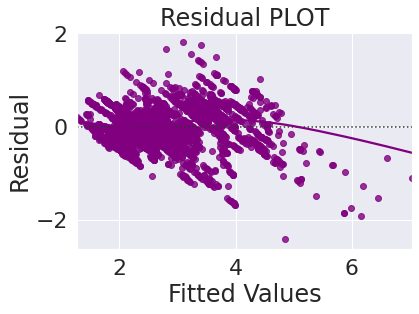

In [ ]:
# predicted values
fitted = olsmodel2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Assumptions 4 is satisfied by our olsmodel2. There is no pattern in the residual vs fitted values plot. 

## Checking Assumption 5: Normality of error terms

The residuals should be normally distributed.

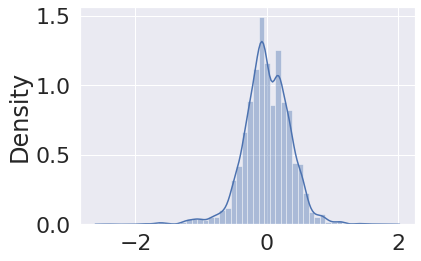

In [ ]:
sns.distplot(residuals)

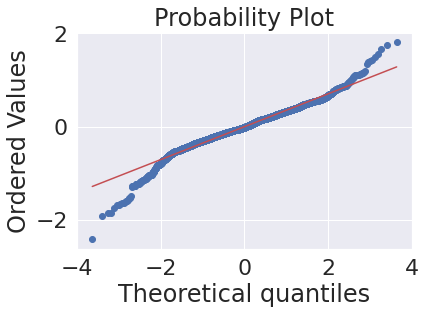

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied. We should further investigate these values in the tails where we have made huge residual errors.

Now that we have seen that olsmodel2 follows all the linear regression assumptions. Let us use this model to draw inferences.

In [ ]:
print(olsmodel2.summary())
# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     798.8
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:15:44   Log-Likelihood:                -1979.2
No. Observations:                5076   AIC:                             4010.
Df Residuals:                    5050   BIC:                             4180.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Observations from the model 

It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.

With our linear regression model we have been able to capture ~89 variation in our data.

The model indicates that the most significant predictors of price of used cars are -

- Age of the car
- Number of seats in the car
- Power of the engine
- Mileage
- Kilometers Driven
- Location
- Fuel_Type
- OwnerType
- Transmission - Automatic/Manual

Newer cars sell for higher prices. 1 unit increase in age of the car leads to [ exp(0.1123) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.

As the number of seats increases, the price of the car increases - exp(0.05) = 1.05 Lakhs

Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.

Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.

The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands

# Recommendations

Our final Linear Regression model has a MAPE of 23% on the test data, which means that we are able to predict within 23% of the price value. This is a very good model but can be further improved

Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.

Based on Analysis, we can to divide our cars into 3 segment Low, Medium and High budget.

Brands like Maruti, Hyundai ,Honda are low budget and very popular brands in used car market.

Brands like BMW, Bentley, Jaguar, Land Rover, Mercedes Benz,Porche,Mini Cooper are high budget cars and are mostly bought by car enthusiast who are ready to buy a two user owned car at higher price as well.

Brands like Toyota,Volvo can be Medium budget cars.

Mumbai and Hyderbad seems to be more popular in Used car market, need to verify this with more data from other demographic regions. The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types.

Need to acquire more Automatic cars to earn more profits, as this car sell at higher prices.

With Increasing petrol rates diesel car are in more demand in recent years, acquiring and selling them can high profits

Along with this we can include scheme like take a test drive for half day to pursue customer to buy.

We can provide Car maintenance packages where customers pays a small upfront fees and can bring the car for servicing anytime in a year to attract more customers.

## Important points

There are more soft parameters which also should be considered when buying a car, the wear and tear the car has been through and how much the company will have to work on car to make it ready for sale.

If the car as already been in some kind of accident that would also effect the price.

Other good to have feature like AC,Moon roof,Airbags can also have impact on the price.

Car model that are too old will depreciate a lot can impact the demand .

In [ ]:
! pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! jupyter nbconvert --to html /content/2. Project_used Car_Quazi Nahida Sultana .ipynb

[NbConvertApp] WARNING | pattern '/content/2.' matched no files
[NbConvertApp] WARNING | pattern 'Project_used' matched no files
[NbConvertApp] WARNING | pattern 'Car_Quazi' matched no files
[NbConvertApp] WARNING | pattern 'Nahida' matched no files
[NbConvertApp] WARNING | pattern 'Sultana' matched no files
[NbConvertApp] WARNING | pattern '.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuratio